# Consistencey Test, Compare to Gupta 2011

We rerun the age estimates on the objects analayed by Gupta et al. 2001 and see what if any significant changes their are.

## Getting started

In [1]:
import numpy as np
from astropy.table import Table

In [58]:
from astropy.table import join

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
filepath = '../resources/ages_gupta.tsv'
RoseData = Table.read(filepath, format='ascii.commented_header', delimiter='\t')
RoseData['SN ID'] = RoseData['SN ID'].astype(int)    # Convert SN ID from float

In [38]:
filepath = '../data/Gupta11_table2.txt'
GuptaData = Table.read(filepath, format='ascii.csv', delimiter='\t', 
                       header_start=2, data_start=3, fill_values = ('...', 'np.nan'))
#Note ascii.commented_header NEEDS commented lines?
#This maskes the cells that were '...'

In [39]:
NotTested = [2943, 3199, 5844, 6649, 7512, 8030, 13956, 13757, 14298, 19067]   #could not get photomety
# NotTested.extend((19794, 20376, 20821)) #need to finish CRC Run, 05-11 was killed before completion

In [40]:
print(len(GuptaData))
for i in NotTested:
    #find index of 'SN ID' match. Convert to int. Remove row.
    GuptaData.remove_row(np.where(GuptaData['SN ID'] == i)[0][0])
print(len(GuptaData))

206
196


# Verrify the correct data points

In [41]:
print(len(GuptaData))
print(len(RoseData))

196
196


In [42]:
GuptaData[:5]

SN ID,IAU,RA,Dec,redshift,redshift uncert,M -,M,M +,Age -,Age,Age +,c,c uncert,x_1,x_1 uncert,HR,HR uncert
int64,str6,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1166,--,9.3552761078,0.9739487767,0.3824,0.0005,11.08,11.15,11.22,4.13,6.47,7.53,0.023,0.068,1.274,1.103,-0.3288,0.2179
1253,2005fd,323.798583984,0.1628694236,0.262,0.005,11.27,11.34,11.39,5.89,7.8,8.03,-0.119,0.058,-1.28,0.464,-0.1097,0.1611
1371,2005fh,349.373748779,0.4296737611,0.11915,0.00012,10.95,11.0,11.02,5.27,6.76,7.26,-0.084,0.02,0.703,0.167,-0.1775,0.0566
1580,2005fb,45.3238296509,-0.6422790885,0.183,8e-05,10.61,10.73,10.83,3.58,5.2,6.95,-0.058,0.026,0.675,0.271,-0.1156,0.0775
1688,--,321.357818603,0.3248503506,0.3587,0.0005,10.09,10.2,10.32,1.5,2.04,2.74,0.007,0.07,1.019,1.306,0.024,0.2309


In [56]:
RoseData[:5]

SN ID,Age,Upper CR,Lower CR
int64,float64,float64,float64
10550,4.51489811887,0.971623001276,1.39139335902
1166,5.42913858325,1.45862812099,3.79324212393
1253,6.83207773408,1.75448554822,4.82135103629
12781,9.56795380032,1.37664410077,7.69037317906
12843,6.28918546912,1.07598519919,1.09949839532


## Combine into one table

Combining into one table forces them to allow for 

In [63]:
data = join(RoseData, GuptaData[['SN ID', 'Age', 'Age +', 'Age -']] , keys='SN ID')
data[:5]

SN ID,Age_1,Upper CR,Lower CR,Age_2,Age +,Age -
int64,float64,float64,float64,float64,float64,float64
1166,5.42913858325,1.45862812099,3.79324212393,6.47,7.53,4.13
1253,6.83207773408,1.75448554822,4.82135103629,7.8,8.03,5.89
1371,8.64796261891,1.65549654873,6.68094912686,6.76,7.26,5.27
1580,7.06429545522,1.82371931929,4.7094666671,5.2,6.95,3.58
1688,3.96757717584,0.828081912205,1.14158883382,2.04,2.74,1.5


## Look at Uncertainties

In [64]:
yerr = (data['Upper CR'] + data['Lower CR'])/2
xerr = ( (data['Age_2']-data['Age -']) + (data['Age +']-data['Age_2']) )/2

In [90]:
print('Rose 2018')
print(np.median(yerr))
print(np.median(np.abs(yerr - np.median(yerr))))

print('\nGupta 2011')
print(np.median(xerr))
print(np.median(np.abs(xerr - np.median(xerr))))

Rose 2018
1.39313653864
0.466632364443

Gupta 2011
1.3825
0.3625


In [93]:
print('Rose 2018')
print(np.mean(yerr))
print(np.std(yerr))

print('\nGupta 2011')
print(np.mean(xerr))
print(np.std(xerr))

Rose 2018
1.77716547758
0.945038547215

Gupta 2011
1.30239795918
0.598739632688


Since Rose 2018 has "worse" mean and standard diviation values but very simmiar median baised values, it appears that Rose 2018 has some "outliers". This can be explained by the two population populations. This produces a very asysmetric error bar, and hence more "outliers" from Gaussian untertainities.

## Does Rose estimate a younger population?

In [120]:
print("Number of objects less then 2 Gyr old")
print("Rose 2018: ",len(data[data['Age_1']<2]))
print("Gupta 2011: ",len(data[data['Age_2']<2]))

Number of objects less then 2 Gyr old
Rose 2018:  4
Gupta 2011:  7


In [122]:
print("Number of objects **minembum age** less then 2 Gyr old")
print("Rose 2018: ",len(data[(data['Age_1']-data['Lower CR'])<2]))
print("Gupta 2011: ",len(data[data['Age -']<2]))

Number of objects **minembum age** less then 2 Gyr old
Rose 2018:  55
Gupta 2011:  19


In [140]:
print("Number of objects **minembum age** less then 1.5 Gyr old")
print("Rose 2018: ",len(data[(data['Age_1']-data['Lower CR'])<1.5]))
print("Gupta 2011: ",len(data[data['Age -']<1.5]))

Number of objects **minembum age** less then 1.5 Gyr old
Rose 2018:  5
Gupta 2011:  3


In [128]:
min(data['Age_1']-data['Upper CR'])

-0.038602926611924104

# Make plots

In [17]:
sns.set_style("whitegrid")

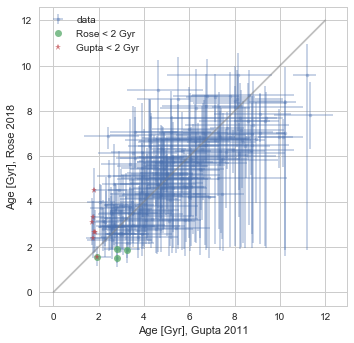

In [145]:
plt.figure('calibration1')
# plt.xscale('log', nonposy='clip')
# plt.yscale('log', nonposy='clip')
plt.plot(np.linspace(0,12), np.linspace(0,12), alpha=0.5, c='grey')
plt.errorbar(data['Age_2'], data['Age_1'],
             xerr=[data['Age_2']-data['Age -'], data['Age +']-data['Age_2']],
             yerr=[data['Lower CR'], data['Upper CR']],
             fmt='.', alpha=0.35, label='data')
# plt.errorbar(data['Age_2'][xerr<1], data['Age_1'][xerr<1], xerr=xerr[xerr<1], yerr=yerr[xerr<1], fmt='.', alpha=0.75)
plt.errorbar(data['Age_2'][data['Age_1']<2], data['Age_1'][data['Age_1']<2],
           fmt='o', alpha=0.75, label='Rose < 2 Gyr')
plt.errorbar(data['Age_2'][data['Age_2']<2], data['Age_1'][data['Age_2']<2],
             fmt='*', alpha=0.75, label='Gupta < 2 Gyr')
# sns.regplot(x=data['Age_2'], y=data['Age_1'])
# sns.jointplot(x=data['Age_2'], y=data['Age_1'], kind="reg")
plt.xlabel('Age [Gyr], Gupta 2011')
plt.ylabel('Age [Gyr], Rose 2018')
plt.axes().set_aspect(1)
# plt.xlim((-0.5, 13.5))
# plt.ylim((-0.5, 13.5))
# plt.plot(np.linspace(0,12), np.linspace(0,12)-2.0)
plt.legend(loc=2)
plt.savefig('ageCalibration_temp.pdf')
plt.show()

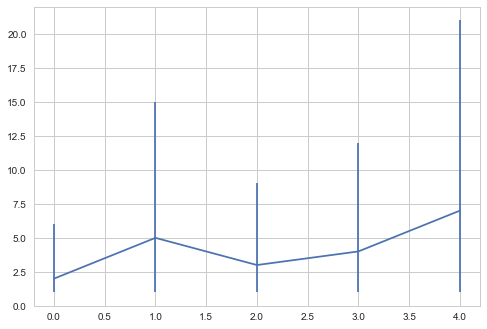

In [135]:
plt.figure('test')
plt.errorbar(range(5), [2,5,3,4,7], yerr=[[1,4,2,3,6],[4,10,6,8,14]])
plt.show()

In [68]:
plt.figure('calibration1')
# plt.xscale('log', nonposy='clip')
# plt.yscale('log', nonposy='clip')
plt.errorbar(GuptaData['Age'], RoseData['age'], xerr=xerr, yerr=yerr, fmt='.', alpha=0.25)
plt.errorbar(GuptaData['Age'][xerr<1], RoseData['age'][xerr<1], xerr=xerr[xerr<1], yerr=yerr[xerr<1], fmt='.', alpha=0.75)
# sns.regplot(x=GuptaData['Age'], y=RoseData['age'])
# sns.jointplot(x=GuptaData['Age'], y=RoseData['age'], kind="reg")
plt.xlabel('Age [Gyr] - Gupta 2011')
plt.ylabel('Age [Gyr] - Rose 2017')
plt.plot(np.linspace(0,12), np.linspace(0,12))
plt.plot(np.linspace(0,12), np.linspace(0,12)-2.0)
plt.savefig('figures/ageCalibration_temp.pdf')
plt.show()

KeyError: 'age'

In [64]:
GuptaData

SN ID,IAU,RA,Dec,redshift,redshift uncert,M -,M,M +,Age -,Age,Age +,c,c uncert,x_1,x_1 uncert,HR,HR uncert
int64,str6,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1166,--,9.3552761078,0.9739487767,0.3824,0.0005,11.08,11.15,11.22,4.13,6.47,7.53,0.023,0.068,1.274,1.103,-0.3288,0.2179
1253,2005fd,323.798583984,0.1628694236,0.262,0.005,11.27,11.34,11.39,5.89,7.8,8.03,-0.119,0.058,-1.28,0.464,-0.1097,0.1611
1371,2005fh,349.373748779,0.4296737611,0.11915,0.00012,10.95,11.0,11.02,5.27,6.76,7.26,-0.084,0.02,0.703,0.167,-0.1775,0.0566
1580,2005fb,45.3238296509,-0.6422790885,0.183,8e-05,10.61,10.73,10.83,3.58,5.2,6.95,-0.058,0.026,0.675,0.271,-0.1156,0.0775
1688,--,321.357818603,0.3248503506,0.3587,0.0005,10.09,10.2,10.32,1.5,2.04,2.74,0.007,0.07,1.019,1.306,0.024,0.2309
2017,2005fo,328.943878174,0.5934827328,0.2616,0.0005,10.48,10.54,10.57,4.26,5.84,6.66,-0.117,0.052,1.272,0.527,0.2671,0.1512
2165,2005fr,17.0916309357,-0.0962756798,0.288,0.005,9.33,9.39,9.46,1.86,2.21,3.52,-0.13,0.038,0.62,0.526,0.3219,0.1315
2330,2005fp,6.8073453903,1.1208769083,0.2132,0.0005,9.83,9.88,9.94,2.8,4.11,6.16,0.083,0.063,-2.238,0.569,0.2954,0.162
2372,2005ft,40.520816803,-0.5410116911,0.1805,0.0005,10.37,10.45,10.49,6.08,7.64,8.81,0.045,0.024,-0.015,0.225,-0.1379,0.0714


In [65]:
RoseData

SN,age,age-uncert,age+uncert
int64,float64,float64,float64
1166,2.24726963043,1.04496121407,0.502037227154
1253,3.18795919418,1.79519927502,1.32779455185
1371,0.0182669144124,0.00122318579815,0.000929805915803
1580,0.0065697375685,0.000385548250051,0.000431691121776
1688,0.58418571949,0.0444331504405,0.0397054851055
2017,1.64341855049,0.0973108559847,0.0833257585764
2165,1.40117573738,0.773038029671,0.679863572121
2330,0.00938008446246,0.0612789280713,0.00525784539059
2372,1.84734380245,0.241433665156,0.230671390891


In [70]:
for i in GuptaData['SN ID']:
    if len(np.where(RoseData['SN'] == i)[0]) == 0:
        print(i)

13956


There are those two data points that are "high quality" by Gupta's defintion, but I disagree with the resulting age by 8 to 10 Gyr! What host are they?

In [131]:
GuptaData[np.logical_and(GuptaData['Age'] > 10, GuptaData['Age'] - GuptaData['Age -'] < 1)]

SN ID,IAU,RA,Dec,redshift,redshift uncert,M -,M,M +,Age -,Age,Age +,c,c uncert,x_1,x_1 uncert,HR,HR uncert
int64,str6,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
12781,2006er,5.4078617096,-1.0106090307,0.08431,0.00016,10.96,10.97,11.02,10.58,11.18,11.58,0.072,0.061,-2.128,0.337,0.1604,0.1149
15776,2006na,32.8302955627,-0.9981175065,0.305,0.005,11.18,11.19,11.21,9.81,10.21,10.21,-0.116,0.081,-1.662,0.743,0.1115,0.2089
